In [ ]:
#Plan d'action

#- importer le package pandas (et on importe le reste de libraries dont on a besoin)
#- importer les 10 fichiers de données plus le referentiel (on s'en sert pas pour le moment) grace à la fontion pd.read_excel()
#- on utilise la fonction pd.concat pour fusioner les 10 dossier excel (hors referentiel), puis on montre le data frame "data"

#-pour changer le type de donnée de la colonne "date" en "date time", voir lignes de code pour voir explication

#- on verifie s'il y a des données manquantes dans notre df data, et puis s'il y en a il faut les remplacer par la valeur qui précede (dernière valeur valide avant la manquante)

#- on commence par calculer le chiffre d'affaires total en faisant la somme des valeurs de la colonne

#- on crée un pivot table qui affiche le CA par mois (lignes) et par région (colonne)

#- importer le fichier referentiel, et faire la jointure avec data

#- créer la colonne mois, on l'a fait dans la question du pivot table car on sentait qu'on avait besoin

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as openpyxl
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
import xlwings as xw

df1 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_1.xlsx")
df2 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_2.xlsx")
df3 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_3.xlsx")
df4 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_4.xlsx")
df5 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_5.xlsx")
df6 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_6.xlsx")
df7 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_7.xlsx")
df8 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_8.xlsx")
df9 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_9.xlsx")
df10 = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\Ventes_2023_Part_10.xlsx")
dfreferentiel = pd.read_excel(r"C:\Users\Adrian\Downloads\examen_data_zip\examen_data\referentiel.xlsx")

data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis = 0, ignore_index=True)
data.head()



,Date,Produit,Région,Quantité,Prix unitaire,Chiffre d'affaires
0,2023-04-13,Produit C,Ouest,9,56.916644,512.249799
1,2023-12-15,Produit C,Ouest,15,97.841244,1467.618661
2,2023-09-28,Produit A,Sud,18,21.299519,383.391348
3,2023-04-17,Produit B,Est,13,11.525290,149.828768
4,2023-03-13,Produit B,Sud,8,79.314239,634.513912


In [12]:
data.rename(columns={"Date":"Datetime"}, inplace=True) # avec cette ligne on renomme la colone date à date time
data["Datetime"] = pd.to_datetime(data["Datetime"]) #cette ligne de code devrait remplacer le format l'ancienne colonne Date en Daytime à l'aide de la fonction pd.to_datetime()
data.info() #pour vérifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            1000 non-null   datetime64[ns]
 1   Produit             1000 non-null   object        
 2   Région              1000 non-null   object        
 3   Quantité            1000 non-null   int64         
 4   Prix unitaire       1000 non-null   float64       
 5   Chiffre d'affaires  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 47.0+ KB


In [14]:
if data.isnull().values.any(): #on utilise des fonctions if pour rechercher des données manquantes (dat.isnull())
    data.fillna(method="ffill", inplace=True) # s'il manquent des données on les remplace dans la cellule existante (inplace=true), et method="ffill" nous aide à mettre la denière valeur valable

In [34]:
CA_total = data["Chiffre d'affaires"].sum() #somme de la colonne chiffre d'affaires déjà existante
print (CA_total)

CA_pp = data.groupby("Produit")["Prix unitaire"].sum() # la fonction groupby nous permet de regrouper les données en fonction d'un critère, dans ce cas là en fonction des produits A, B et C
print(CA_pp)

dfCA_total = pd.DataFrame({"Type de chiffre d'affaires": ["Chiffre d'affaires total"], "Montant": [CA_total]})
dfCA_pp = pd.DataFrame({"Montant": data.groupby("Produit")["Prix unitaire"].sum()}).reset_index() # ici on a mis montant pour que la df soit lisible
dfCA_pp.rename(columns={"Produit":"Type de chiffre d'affaires"}, inplace=True) # je renomme les colonnes pour avoir un df lisible

CA = pd.concat([dfCA_total,dfCA_pp], axis = 0, ignore_index=True)
CA.head()

546231.9551992661
Produit
Produit A    18148.189294
Produit B    18160.604069
Produit C    18413.517714
Name: Prix unitaire, dtype: float64


,Type de chiffre d'affaires,Montant
0,Chiffre d'affaires total,546231.955199
1,Produit A,18148.189294
2,Produit B,18160.604069
3,Produit C,18413.517714


In [36]:
data["Mois"] = data["Datetime"].dt.month # on crée une colonne dans data qui nous sort le mois de la colonne Datetime

pt_CA = pd.pivot_table (data, index = "Mois", columns="Région", values = "Chiffre d'affaires", aggfunc="sum") # on utilise la colonne "Mois" (qui vient d'etre crée) pour le pivot table. En indexe le mois, la region puis on fait la somme des valeures. 
pt_CA.head()

Région,Est,Nord,Ouest,Sud
Mois,,,,
1,10037.028399,13076.338478,7710.564014,8213.807744
2,9837.787233,9853.258419,19094.963887,10051.177005
3,3562.719474,8653.392696,10167.234999,8646.945490
4,9297.540059,14065.944384,10668.264692,14607.472470
5,10449.979162,16075.861928,13966.637315,8783.433772


In [45]:
# on avait déjà importé le fichier referentiel dans la première question

resultat = dfreferentiel.merge(data)
resultat.head()

,Produit,Catégorie,Prix Standard,Datetime,Région,Quantité,Prix unitaire,Chiffre d'affaires,Mois
0,Produit A,Électronique,80,2023-09-28,Sud,18,21.299519,383.391348,9
1,Produit A,Électronique,80,2023-01-21,Sud,8,20.818651,166.549205,1
2,Produit A,Électronique,80,2023-11-27,Est,11,79.582769,875.410455,11
3,Produit A,Électronique,80,2023-04-10,Sud,13,41.328603,537.271844,4
4,Produit A,Électronique,80,2023-06-01,Ouest,2,10.121826,20.243653,6


In [ ]:
#colonne mois déjà crée avant

In [48]:
#on souhaite faire un graphique avec CA en ordinées (Y) et le mois en absice (X), ce qui devrait nous donner 3 courbes differentes (une pour chaque produit). Après visualisation sur python, on importe le graphique sur excel
#pour faire le graphique on crée un pivot table avec le CA par mois en fonction des 3 produits

pt1 = pd.pivot_table (resultat, index = "Mois", columns="Produit", values = "Chiffre d'affaires", aggfunc="sum") # on utilise la colonne "Mois" (qui vient d'etre crée) pour le pivot table. En indexe le mois, la region puis on fait la somme des valeures. 
pt1.head()

Produit,Produit A,Produit B,Produit C
Mois,,,
1,12803.150986,13758.267692,12476.319957
2,19500.600790,12452.659201,16883.926554
3,8579.990751,13033.078308,9417.223600
4,18735.212658,14391.219517,15512.789431
5,17399.311643,19178.054707,12698.545827


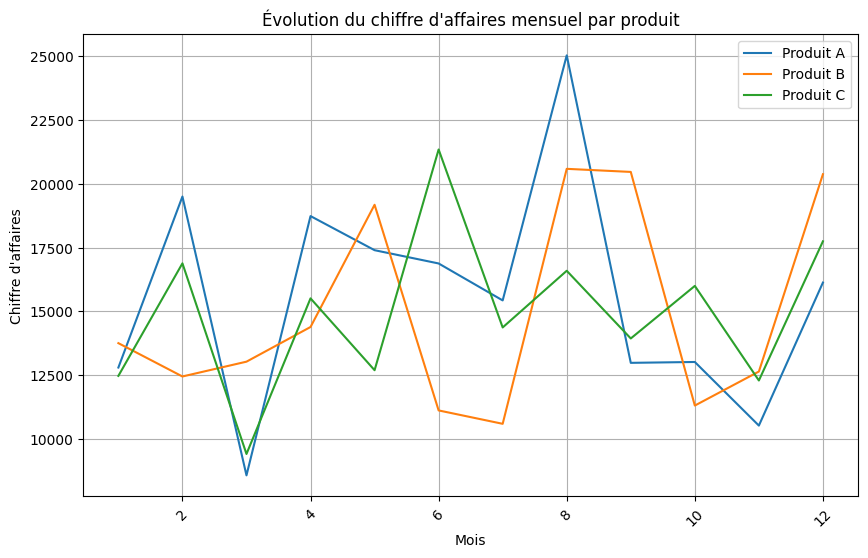

In [49]:

# Création du graphique pour l'évolution du chiffre d'affaires mensuel par produit
plt.figure(figsize=(10, 6))  # Définition de la taille du graphique

# Tracé du chiffre d'affaires mensuel pour chaque produit
for produit in pt1.columns:
    plt.plot(pt1.index, pt1[produit], label=produit)  # Tracé du chiffre d'affaires mensuel par produit

plt.title("Évolution du chiffre d'affaires mensuel par produit")  # Titre du graphique
plt.xlabel("Mois")  # Nom de l'axe des abscisses
plt.ylabel("Chiffre d'affaires")  # Nom de l'axe des ordonnées
plt.legend()  # Affichage de la légende avec les produits
plt.grid(True)  # Affichage de la grille
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité

plt.show()  # Affichage du graphique


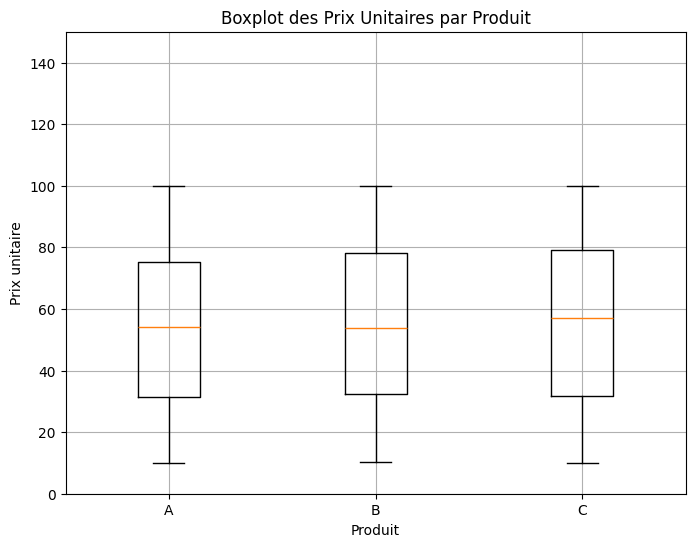

In [66]:
# Création du boxplot des prix unitaires par produit
plt.figure(figsize=(8, 6))  # Définition de la taille du graphique

# Liste des prix unitaires par produit
prix_A = data[data["Produit"] == "Produit A"]["Prix unitaire"]
prix_B = data[data["Produit"] == "Produit B"]["Prix unitaire"]
prix_C = data[data["Produit"] == "Produit C"]["Prix unitaire"]

# Création du boxplot avec les données
plt.boxplot([prix_A, prix_B, prix_C], labels=["A", "B", "C"])

# Ajout de titres et d'étiquettes
plt.title("Boxplot des Prix Unitaires par Produit")  # Titre du graphique
plt.xlabel("Produit")  # Nom de l'axe des abscisses
plt.ylabel("Prix unitaire")  # Nom de l'axe des ordonnées

# Définir l'échelle de l'axe des ordonnées (y-axis) de 0 à 100
plt.ylim(0, 150)

plt.grid(True)  # Affichage de la grille
plt.show()  # Affichage du boxplot

In [70]:
# Créer un nouveau classeur Excel

wb = xw.Book()

 

# Ajouter les données DataFrame "data" dans la première feuille

data_sheet = wb.sheets.add('Data')

data_sheet.range('A1').value = data

 

# Ajouter le boxplot et le graphique d'évolution du chiffre d'affaires mensuel dans la deuxième feuille

graph_sheet = wb.sheets.add('Graphiques')

graph_sheet.pictures.add('boxplot_prix_unitaires.png', name='Boxplot', left=graph_sheet.range('A1').left, top=graph_sheet.range('A1').top)

# Supposons que vous ayez déjà créé le graphique d'évolution du chiffre d'affaires mensuel et sauvegardé dans un fichier image nommé 'evolution_ca_mensuel.png'

graph_sheet.pictures.add('evolution_ca_mensuel.png', name='Evolution CA Mensuel', left=graph_sheet.range('G1').left, top=graph_sheet.range('G1').top)

 

# Ajouter les données DataFrame "CA" et la pivot table dans la troisième feuille

ca_sheet = wb.sheets.add('CA')

ca_sheet.range('A1').value = CA

 

# Sauvegarder le classeur Excel

wb.save('Analyse_CA.xlsx')

com_error: (-2147352567, 'Ocurrió una excepción.', (0, None, "The specified file wasn't found.", None, 0, -2146827284), None)

# tronc avancé

pour identifier les produits dont la vente est la plus flucuante en prix:
on peut reprendre la boxplot généré en question 9. grâce au graphique nous pouvons observer les valeurs extrèmes. Pour connaitre le produit dont la vente est la plus fluctuante on pourrait rajouter une ligne de code qui affiche les valeurs extremes et les comparer pour savoir quel est le produit dont la vente est la plus fluctuante

pour savoir si les prix qu'elle applique ont une incidence sur les quantités vendus, oon effectue une regression linéaire à l'aide du package sklearn.linear_model. Si on trouve un coefficient positif ca veut dire que si le prix augmente la quantité vendue augmente égalment. Inversement si le coefficient est negatif, lorsque le prix augmente la quantité vendue diminue.

